<a href="https://colab.research.google.com/github/arumugammani02/Task-7/blob/main/KNN_Assignment13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [4]:
df = pd.read_csv('Social_Network_Ads.csv')

In [5]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
df.drop(['User ID','Gender'],axis=1)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [7]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

**Splitting the dataset into the Training set and Test set**

In [8]:
X=df[['Age','EstimatedSalary']]
y=df['Purchased']

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [10]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [11]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

**Feature Scaling**

In [12]:
ss= StandardScaler()
X_train= ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [ ]:
X_train

In [ ]:
X_test

In [15]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
14     0
363    0
304    0
361    1
329    1
Name: Purchased, Length: 80, dtype: int64

**Fitting K-NN to the Training set**

In [16]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
knn.score(X_test,y_test)

0.95

In [19]:
gsc = GridSearchCV(KNeighborsClassifier(),{"n_neighbors":[1,2,3,4,5,6,7,8,9,10,20,30,40,50]},cv=10)

In [20]:
gsc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30,
                                         40, 50]})

In [21]:
mms = MinMaxScaler()

In [22]:
X_train = mms.fit_transform(X_train)
X_test =  mms.transform(X_test)

**Predicting the Test set results**

In [23]:
y_pred = knn.predict(X_test)

In [24]:
y_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1])

**Making the Confusion Matrix**

In [25]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix_1 = confusion_matrix(y_test, y_pred)
y_pred = knn.predict(X_train)
confusion_matrix_2= confusion_matrix(y_train, y_pred)
print(confusion_matrix_1)
print(confusion_matrix_2)

[[39 19]
 [ 6 16]]
[[143  56]
 [ 44  77]]


Text(51.0, 0.5, 'Truth')

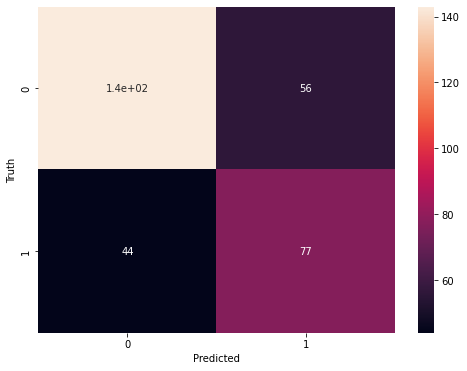

In [26]:
#Visualising the Training set results
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(51.0, 0.5, 'Truth')

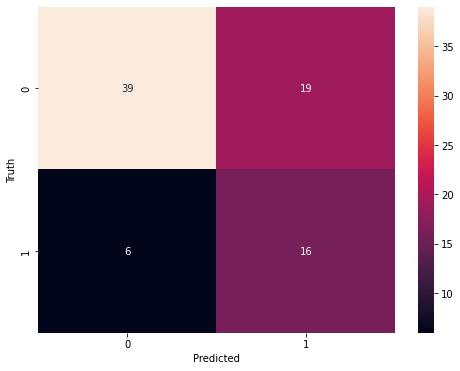

In [27]:
#Visualising the Test set results
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')